In [ ]:

import pandas as pd

In [2]:
df = pd.read_csv('train_0irEZ2H.csv')

In [3]:
df



,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
# Data cleaning
# splitting the week column into day, month, and year

df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)

In [5]:
df = df.drop(columns=['week'], axis=1)

In [6]:
# resultant dataframe
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [7]:
# using randomforest regressor to predict units sold which has continuous numeric values
from sklearn.ensemble import RandomForestRegressor


In [8]:
# splitting the data into 2 parts
from sklearn.model_selection import train_test_split

X = df.drop(columns=['units_sold'], axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor()

# training the model with random forest regressor
model.fit(X_train, y_train) 

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# measuring accuracy of the model

model.score(X_test, y_test)

0.7788070946220773

In [15]:
# rmse helps in evaluating the accuracy of model's predictions from actual values, on average

from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

26.939967122686483

<Axes: >

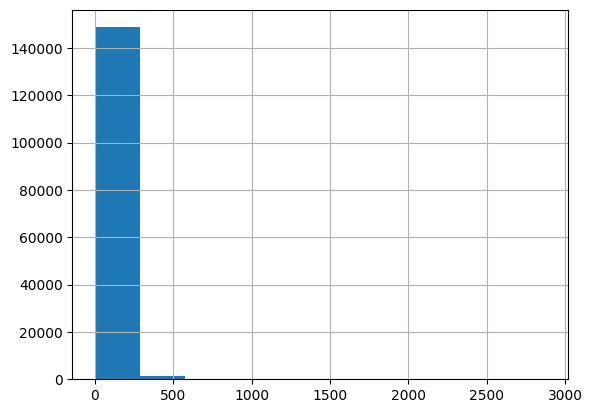

In [19]:
df.units_sold.hist()

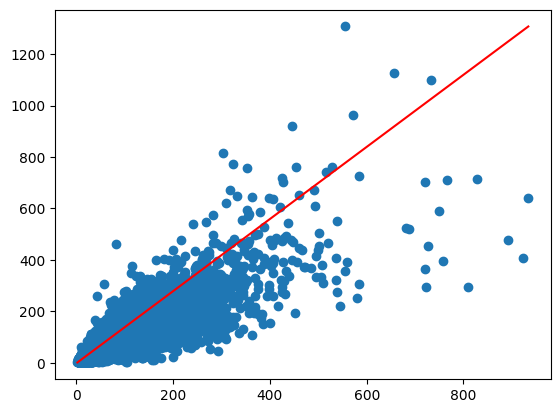

In [23]:
# the histogram shows that the units sold is not normally distributed, it is right skewed, it has a severe outlier problem

# matplotlib will help in better visualizing the data

import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

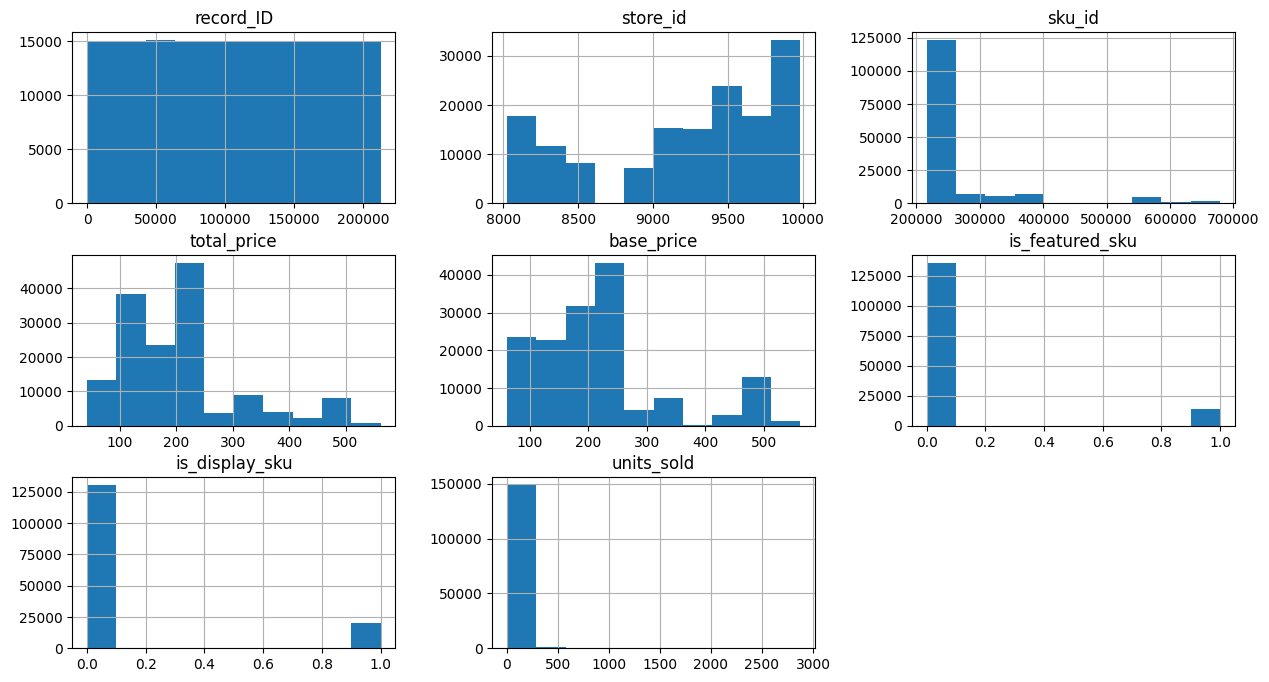

In [28]:
df.hist(figsize = (15, 8))
plt.show()    

In [30]:
# to solve the outlier problem, we will have to further clean the data

In [31]:
# dropping record_ID, because it does not hold much significance in the data

df = df.drop(columns=['record_ID'], axis=1)

In [33]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [34]:
# the maximum value of units sold is 2876, which is an outlier. 
# we will calculate the 99%ile units sold value and drop all the rows with units sold greater than that value.

df = df[df.units_sold < df.units_sold.quantile(0.99)]


In [35]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

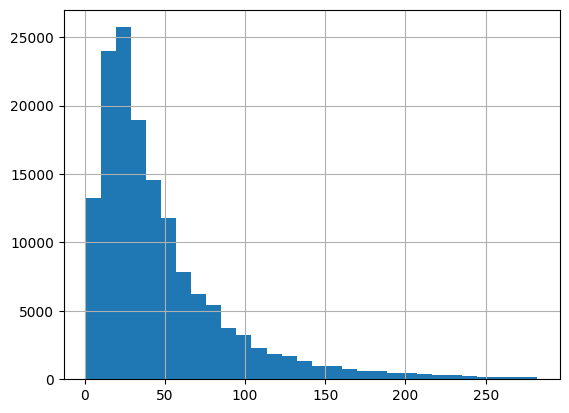

In [39]:
df.units_sold.hist(bins=30)

In [40]:
X = df.drop(columns=['units_sold'], axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestRegressor()

model.fit(X_train, y_train) 

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
model.score(X_test, y_test)

0.8072716856500599

In [43]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

In [44]:
rmse


18.739645151218

In [45]:
# because of further cleaning, the rmse has reduced from 26.93 to 18.73, which is a significant improvement


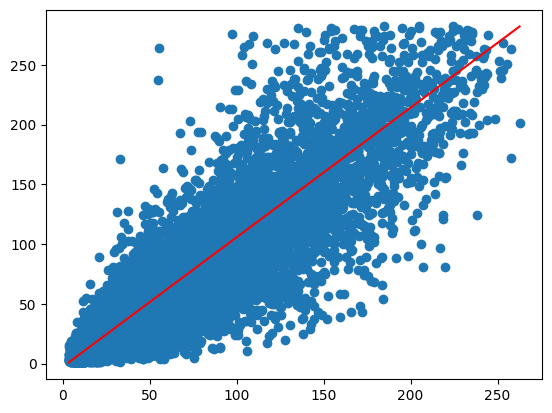

In [46]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')

In [47]:
# the improvement in the model is visible in the scatter plot, where the points are closer to the red line.
# it is indicating better predictions.

In [57]:
# hyperparameter tuning to improve the model further
# we will use GridSearchCV to find the best hyperparameters for the model

from sklearn.model_selection import GridSearchCV

param_grid = {
     'n_estimators': [100, 200],
   'min_samples_split': [2, 3]
}

model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..............min_samples_split=2, n_estimators=100; total time=  23.4s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=  22.4s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=  22.4s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  44.3s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  46.3s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=  45.7s
[CV] END ..............min_samples_split=3, n_estimators=100; total time=  20.9s
[CV] END ..............min_samples_split=3, n_estimators=100; total time=  21.3s
[CV] END ..............min_samples_split=3, n_estimators=100; total time=  21.2s
[CV] END ..............min_samples_split=3, n_estimators=200; total time=  41.4s
[CV] END ..............min_samples_split=3, n_estimators=200; total time= 1.5min
[CV] END ..............min_samples_split=3, n_est

,estimator,RandomForestRegressor()
,param_grid,"{'min_samples_split': [2, 3], 'n_estimators': [100, 200]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [58]:
best_model = grid_search.best_estimator_


In [59]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 200}

In [60]:
# model = randomforest regressor with n_estimators=200 and min_samples_split=3
best_model.score(X_test, y_test)

0.8086868590353872

In [ ]:
# this results in a score of 0.808 which signifies it gives an accuracy of 80.8% on the test set. 
# score of 1 signifies perfect accuracy, and 0 signifies no accuracy.